<a href="https://colab.research.google.com/github/Pythonimeislabor/repo1/blob/main/erstes_neuronales_Netz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datensatz von kaggle herunterladen

In [1]:
%%writefile kaggle.json
{"username":"lutze3","key":"c1b954a36f5402b976973271cb154a2f"}

Writing kaggle.json


In [2]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!kaggle datasets download -d jcprogjava/handwritten-digits-dataset-not-in-mnist
!unzip handwritten-digits-dataset-not-in-mnist.zip

from IPython.display import clear_output
clear_output()

# imports

In [3]:
import cv2
import matplotlib.pyplot as plt

# Testweise ein Bild laden und anzeigen

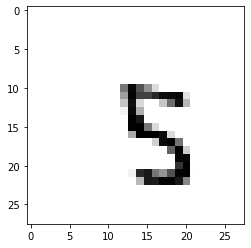

In [4]:
dateipfad = "dataset/5/5/0.png"
bild = cv2.imread(dateipfad, cv2.IMREAD_UNCHANGED) # bild lesen
plt.imshow(bild)

(28, 28)


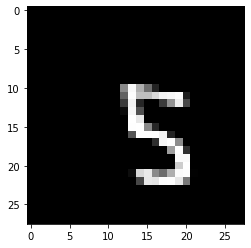

In [5]:
bild_in_grau = bild[:,:,3]
print(bild_in_grau.shape)
plt.imshow(bild_in_grau, cmap="gray")

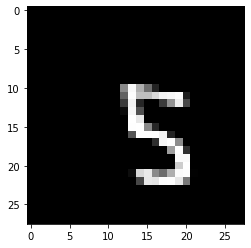

In [6]:
bild_0_1 = bild_in_grau / 255 # bild zwischen 0 und 1 skalieren
plt.imshow(bild_0_1, cmap = "gray")

# Alle Bilder und Beschriftungen in 2 Listen speichern

In [7]:
#X = [bild1, bild2, bild3]
#Y = [Beschriftung1, Beschriftung2, Beschriftung3]

X = []
Y = []

import os

def lade_bild(pfad):
  bild = cv2.imread(pfad, cv2.IMREAD_UNCHANGED) # bild lesen im bgra-format
  bild_in_grau = bild[:,:,3]
  bild_0_1 = bild_in_grau / 255 # bild zwischen 0 und 1 skalieren
  return bild_0_1


for zahl in range(10):
  pfad = "dataset/"+str(zahl)+"/"+str(zahl) + "/"
  print(pfad)
  alle_bilder_namen = os.listdir(pfad) # alle bilder im pfad auflisten
  for name in alle_bilder_namen: # alle bilder in dem Ordner durchgehen
    pfad_zum_bild = pfad + name 
    bild = lade_bild(pfad_zum_bild)

    X.append(bild)
    Y.append(zahl)

dataset/0/0/
dataset/1/1/
dataset/2/2/
dataset/3/3/
dataset/4/4/
dataset/5/5/
dataset/6/6/
dataset/7/7/
dataset/8/8/
dataset/9/9/


Y ist  4


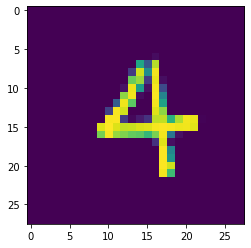

In [8]:
index = 50000

plt.imshow(X[index]), 
print("Y ist ", Y[index])

In [9]:
import numpy as np

# listen in numpy arrays umwandeln
Y = np.array(Y) # numpy arrays sind für viele Elemente eine bessere speichermethode
X = np.array(X) # tensorflow benötigt numpy arrays und kann nicht mit listen arbeiten

p = np.random.permutation(Y.shape[0]) # X und Y gleichmäßig mischen
X = X[p]
Y = Y[p] 

# Neuronales Netzwerk bauen

In [10]:
import tensorflow as tf

inputlayer = tf.keras.layers.Input(shape=(28,28))

inputlayer = tf.keras.layers.Reshape((28,28,1))(inputlayer)

random_rotation = tf.keras.layers.RandomRotation((-0.05, 0.05))(inputlayer)
random_verschieben = tf.keras.layers.RandomTranslation((-0.05,0.05),(-0.05,0.05))(random_rotation)

x = tf.keras.layers.Conv2D(32,3,activation="relu")(random_verschieben)

platt = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(16,activation="relu")(platt)
x = tf.keras.layers.Dense(16,activation="relu")(x)
x = tf.keras.layers.Dense(16,activation="relu")(x)
output = tf.keras.layers.Dense(10,activation="softmax")(x)

model = tf.keras.Model(inputlayer, output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 random_rotation (RandomRota  (None, 28, 28, 1)        0         
 tion)                                                           
                                                                 
 random_translation (RandomT  (None, 28, 28, 1)        0         
 ranslation)                                                     
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 16)                346128

In [11]:
fehlerfunktion = tf.keras.losses.SparseCategoricalCrossentropy()
optimierer = tf.keras.optimizers.SGD(0.001, momentum = 0.95)
model.compile(optimierer, fehlerfunktion, metrics="accuracy")

In [12]:
model.fit(X, Y, batch_size = 64, epochs = 2, validation_split = 0.2) # Parameter optimieren

Epoch 1/2
1347/1347 [==============================] - 42s 30ms/step - loss: 1.3316 - accuracy: 0.5359 - val_loss: 0.2920 - val_accuracy: 0.9018
Epoch 2/2
1347/1347 [==============================] - 41s 30ms/step - loss: 0.2947 - accuracy: 0.8997 - val_loss: 0.1249 - val_accuracy: 0.9598


In [15]:
model.save("model.h5")

# Test mit selbstgemaltem Bild

In [ ]:
bild = cv2.imread("Untitled.png", cv2.IMREAD_GRAYSCALE) # bild lesen im graustufen-format
bild = cv2.blur(bild,(2,2))
bild_0_1 = 1 - bild / 255 # bild zwischen 0 und 1 skalieren
bild_0_1 = cv2.resize(bild_0_1, (28,28))
plt.imshow(bild_0_1, cmap = "gray")
bild_0_1.shape

In [ ]:
bild_batch = np.reshape(bild_0_1,(1,28,28)) # tensorflow braucht ein array von Inputs

entscheidungen = model(bild_batch)
print("Die Entscheidungen sind:", entscheidungen)
print("Das ist die Zahl:", np.argmax(entscheidungen))